In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

# Operations de base

1. degré appartenance

In [2]:
def degre_appartenance(x, sef):
    # si le point n'est pas compris dans l'ensemble alors son degré d'appartenance = 0
    if x < sef[0][0]:
        return sef[0][1]
    if x > sef[-1][0]:
        return sef[-1][1]
    # si le point est un point de sef alors son degré d'appartenance est connu
    for s in sef:
        if x == s[0]:
            return s[1]
    # si le point n'est pas un point de sef alors on calcule son degré d'appartenance à partir de l'equation de la droite entre sef[i] et sef[i+1]
    for i in range(len(sef)-1):
        if x > sef[i][0] and x < sef[i+1][0]:
            return (sef[i+1][1]-sef[i][1])/ (sef[i+1][0]-sef[i][0]) * (x-sef[i][0]) + sef[i][1]

In [3]:
sef1 = [(1,0),(4,1),(6,0.6),(7,0.3),(9,1),(10,0.5),(15,0)]

x0 = 20
x1 = 3
x2 = 5
print(degre_appartenance(x0, sef1))
print(degre_appartenance(x1, sef1))
print(degre_appartenance(x2, sef1))

0
0.6666666666666666
0.8


2. fonction de visualisation

In [4]:
def visualisation(sef_liste,pas):
    borne_inf = min([sef_liste[i][0][0]for i in range(len(sef_liste))]) - 5
    borne_sup = max([sef_liste[i][-1][0]for i in range(len(sef_liste))]) + 5
    for i in range(len(sef_liste)):
        x = np.linspace(borne_inf, borne_sup, pas)
        y = []
        for j in x:
            y.append(degre_appartenance(j, sef_liste[i]))
        plt.plot(x, y, label = f'sef{i}')
        plt.legend()

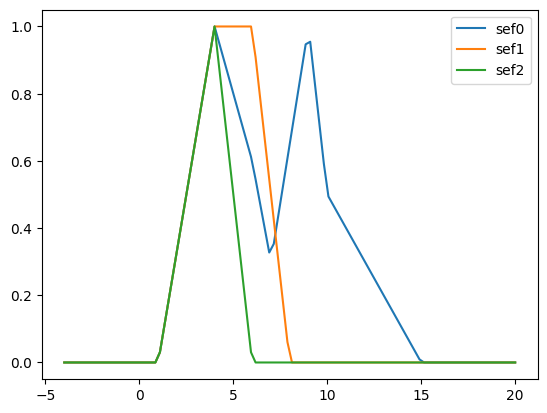

In [5]:
sef2 = [(1,0),(4,1),(6,1),(8,0)]
sef3 = [(1,0),(4,1),(6,0)]
borne_inf = 0
borne_sup = 25

visualisation([sef1, sef2, sef3], 100)

# Opérations ensemblistes

1. complémentaire

In [6]:
def complementaire_sef(sef):
    sef_complementaire = []
    for i in range(len(sef)):
        sef_complementaire.append((sef[i][0],1-sef[i][1]))
    return sef_complementaire



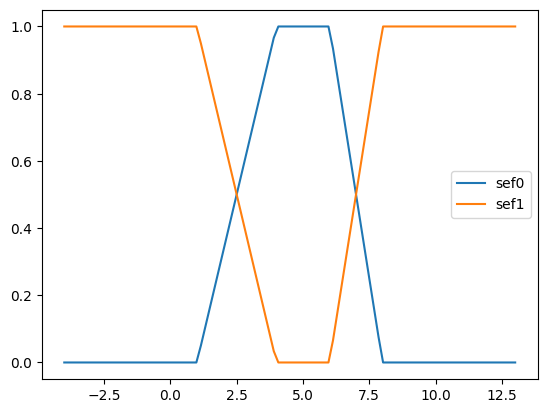

In [7]:
sef2 = [[1,0],[4,1],[6,1],[8,0]]
visualisation([sef2,complementaire_sef(sef2)], 100)

2.1 t-normes

In [8]:
class t_normes:
    def __init__(self, nom):
        self.nom = nom
        self

    def __call__(self, x, y):
        return self.fonction(x,y)

    def __str__(self):
        return self.nom



class probabiliste(t_normes):
    def __init__(self, nom, fonction):
        super().__init__(nom, fonction)
        self.nom = 'probabiliste'
        self.fonction =

    def __call__(self, x, y):
        self.fonction(x, y) = x*y
        return self.function


SyntaxError: invalid syntax (1292591387.py, line 18)

In [9]:
class TNorm:
    def __init__(self, nom, fonction):
        self.nom = nom
        self.fonction = fonction

    def __call__(self, x, y):
        return self.fonction(x, y)

    def __str__(self):
        return self.nom


class Probabiliste(TNorm):
    """
    T-norme probabiliste
    """
    def __init__(self):
        super().__init__("probabiliste", lambda x, y: x * y)



class Luka(TNorm):
    """
    T-norme Lukasiewicz.
    """

    def __init__(self):
        super().__init__("Lukasiewicz", lambda x, y: max(x+y-1, 0))


class Zadeh(TNorm):
    """
    T-norme Zadeh.
    """

    def __init__(self):
        super().__init__("Zadeh", lambda x, y: min(x,y))


class Hamacher(TNorm):
    """
    T-norme Hamacher.
    """

    def __init__(self):
        super().__init__("Produit d'Hamacher", lambda x, y: 0 if x==y==0 else (x*y) / (x+y-x*y))


class Drastique(TNorm):
    """
    T-norme Drastique.
    """

    def __init__(self):
        super().__init__("Drastique", lambda x, y: y if x==1 else (x if y==1  else 0))





In [10]:
tnorm = Probabiliste()
print(tnorm.nom)
print(tnorm(0.5, 0.7))

tnorm = Luka()
print(tnorm.nom)
print(tnorm(0.5, 0.7))

tnorm = Zadeh()
print(tnorm.nom)
print(tnorm(0.5, 0.7))

tnorm = Hamacher()
print(tnorm.nom)
print(tnorm(0.5, 0.7))

tnorm = Drastique()
print(tnorm.nom)
print(tnorm(0.5, 0.7))


probabiliste
0.35
Lukasiewicz
0.19999999999999996
Zadeh
0.5
Produit d'Hamacher
0.4117647058823529
Drastique
0


    
proba = probaliste(proba, min())

resultat = proba.fonction(x,y)

2.2 t-conormes

In [11]:
class TcoNorm:
    def __init__(self, nom, fonction):
        self.nom = nom
        self.fonction = fonction

    def __call__(self, x, y):
        return self.fonction(x, y)

    def __str__(self):
        return self.nom



class DualProbabiliste(TcoNorm):
    """
    T-conorme probabiliste.
    """
    def __init__(self):
        super().__init__("dual_probabiliste", lambda x, y: x+y-x*y)



class DualLuka(TcoNorm):
    """
    T-conorme Lukasiewicz.
    """

    def __init__(self):
        super().__init__("dual_Lukasiewicz", lambda x, y: min(x+y, 1))


class DualZadeh(TcoNorm):
    """
    T-conorme Zadeh.
    """

    def __init__(self):
        super().__init__("Dual_Zadeh", lambda x, y: max(x,y))


class DualHamacher(TcoNorm):
    """
    T-conorme Hamacher.
    """

    def __init__(self):
        super().__init__("Dual_Produit d'Hamacher", lambda x, y: (x+y)/ (1+x*y))


class DualDrastique(TcoNorm):
    """
    T-conorme Drastique.
    """

    def __init__(self):
        super().__init__("Dual_Drastique", lambda x, y: y if x==0 else (x if y==0  else 1))

In [12]:
tnorm = DualProbabiliste()
print(tnorm.nom)
print(tnorm(0.5, 0.7))

tnorm = DualLuka()
print(tnorm.nom)
print(tnorm(0.5, 0.7))

tnorm = DualZadeh()
print(tnorm.nom)
print(tnorm(0.5, 0.7))

tnorm = DualHamacher()
print(tnorm.nom)
print(tnorm(0.5, 0.7))

tnorm = DualDrastique()
print(tnorm.nom)
print(tnorm(0.5, 0.7))

dual_probabiliste
0.85
dual_Lukasiewicz
1
Dual_Zadeh
0.7
Dual_Produit d'Hamacher
0.8888888888888888
Dual_Drastique
1


3.1 fonctions d'intersection

In [13]:
def intersection(interval,sefA,sefB,tnorm):
    # discretiser univers considéré soit l'interval
    x = np.linspace(interval[0], interval[1], 20)
    y=[]
    sefC = []
    for i in x:
        y.append(tnorm(degre_appartenance(i, sefA),degre_appartenance(i,sefB)))
    for i in range(len(x)):
        sefC.append((x[i],y[i]))
    return sefC

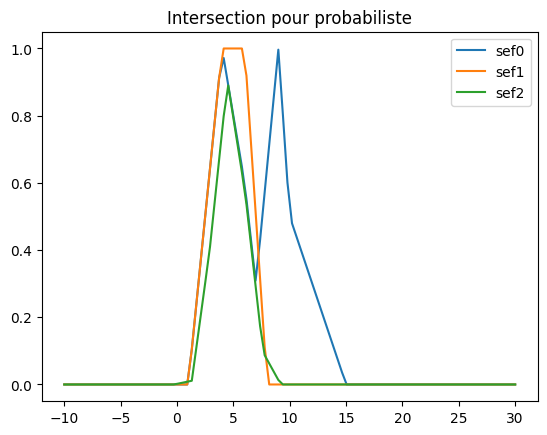

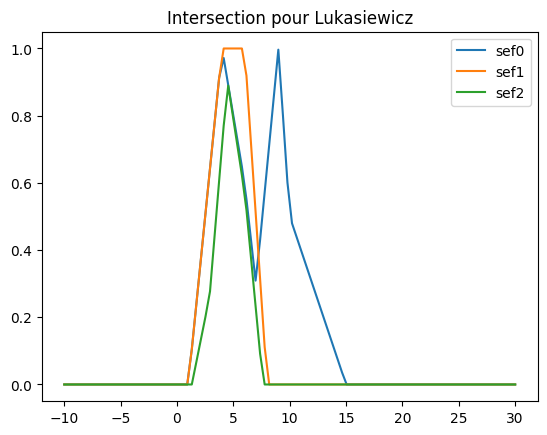

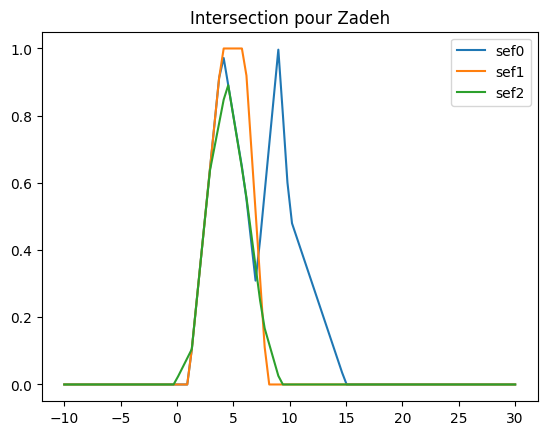

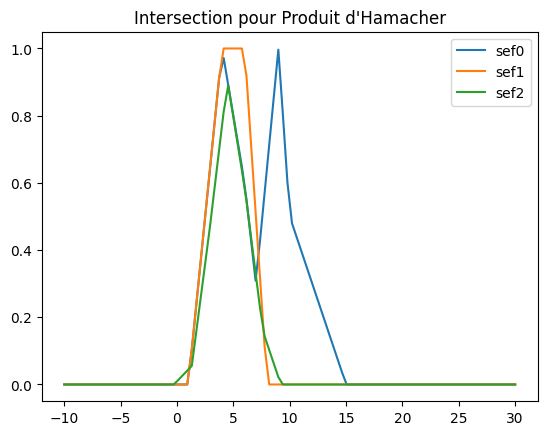

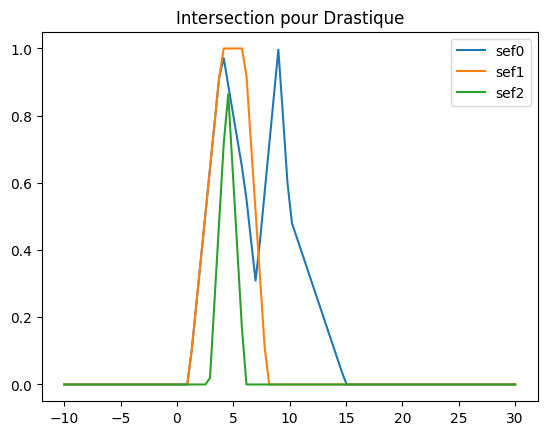

In [14]:
tnorm_liste = [Probabiliste(), Luka(), Zadeh(), Hamacher(), Drastique()]
for i in tnorm_liste:
    sefi = intersection([-5,25],sef1,sef2, i)
    plt.figure()
    plt.title(f'Intersection pour {i.nom}')
    visualisation([sef1,sef2,sefi],100)

3.2 Fonctions d'union

In [15]:
def union(interval,sefA,sefB,tconorm):
    # discretiser univers considéré soit l'interval
    x = np.linspace(interval[0], interval[1], 100)
    y=[]
    sefC = []
    for i in x:
        y.append(tconorm(degre_appartenance(i, sefA),degre_appartenance(i,sefB)))
    for i in range(len(x)):
        sefC.append((x[i],y[i]))
    return sefC


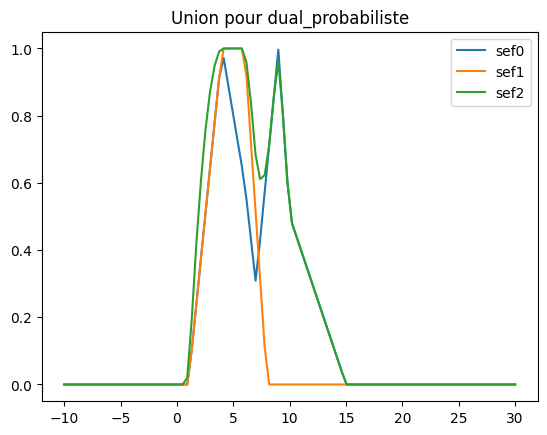

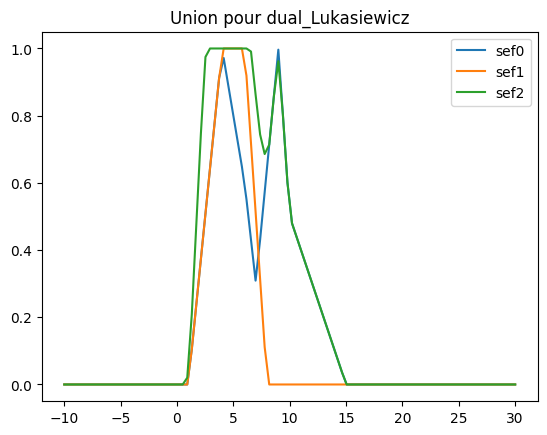

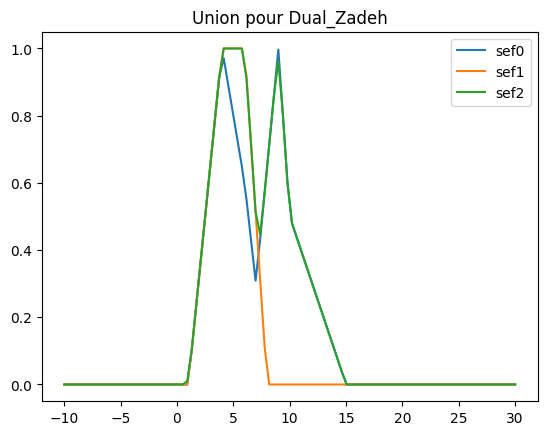

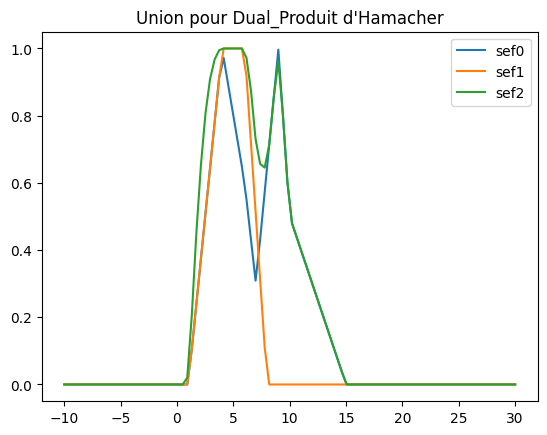

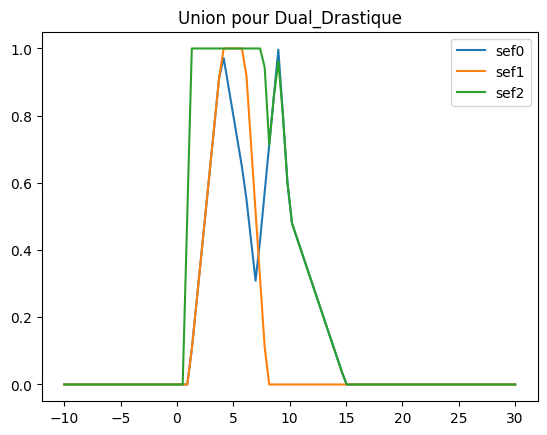

In [16]:
tconorm_liste = [DualProbabiliste(), DualLuka(), DualZadeh(), DualHamacher(), DualDrastique()]
for i in tconorm_liste:
    sefi = union([-5,25],sef1,sef2, i)
    plt.figure()
    plt.title(f'Union pour {i.nom}')
    visualisation([sef1,sef2,sefi],100)

4.1 $A \cap A^c$ Tnorm

Pour la tnorme probabiliste


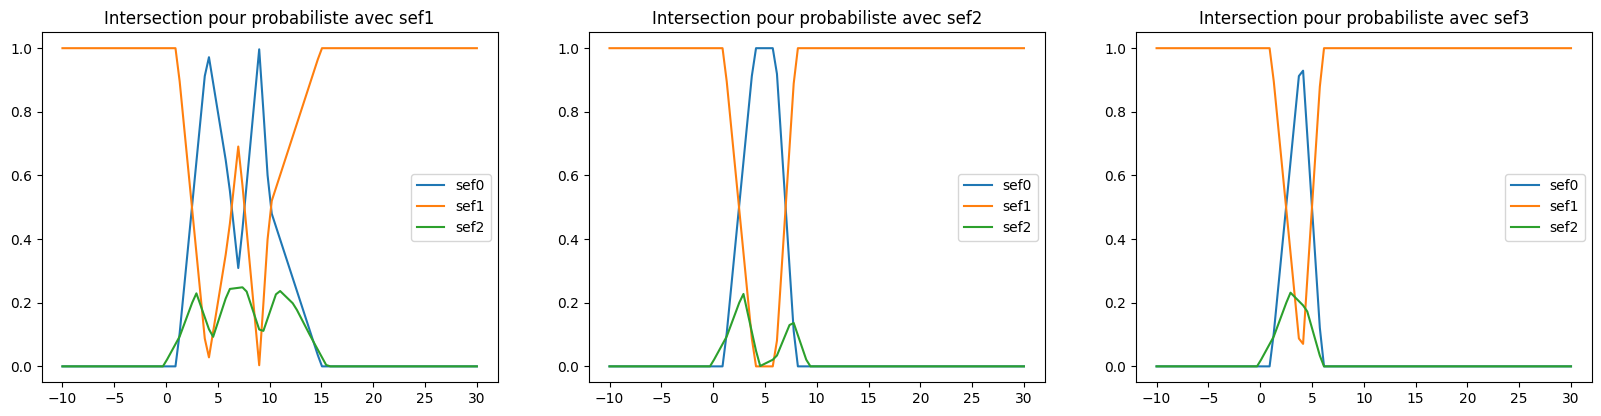

Pour la tnorme Lukasiewicz


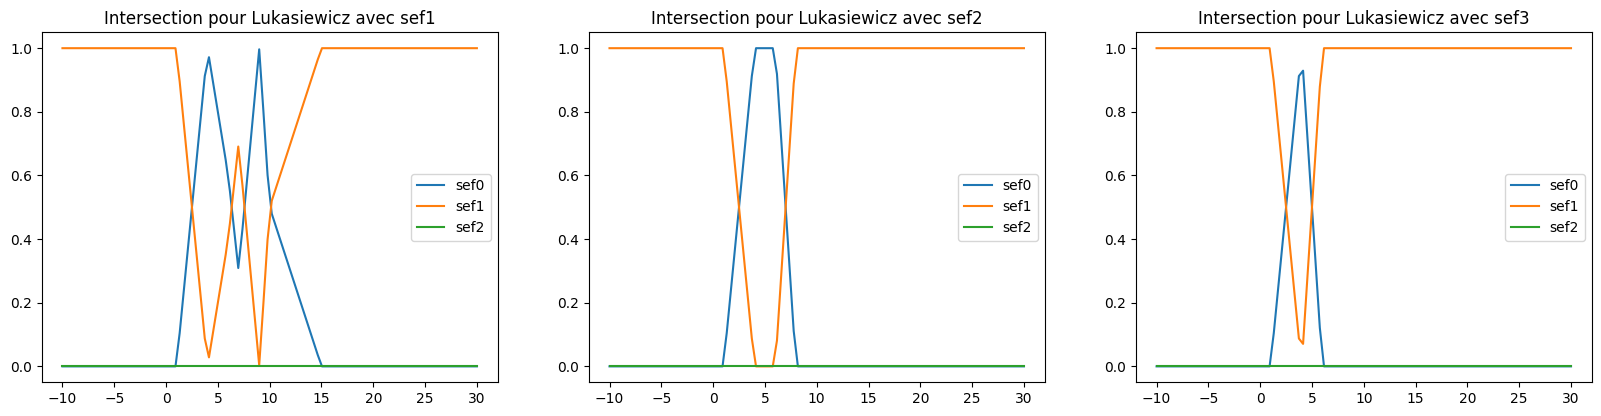

Pour la tnorme Zadeh


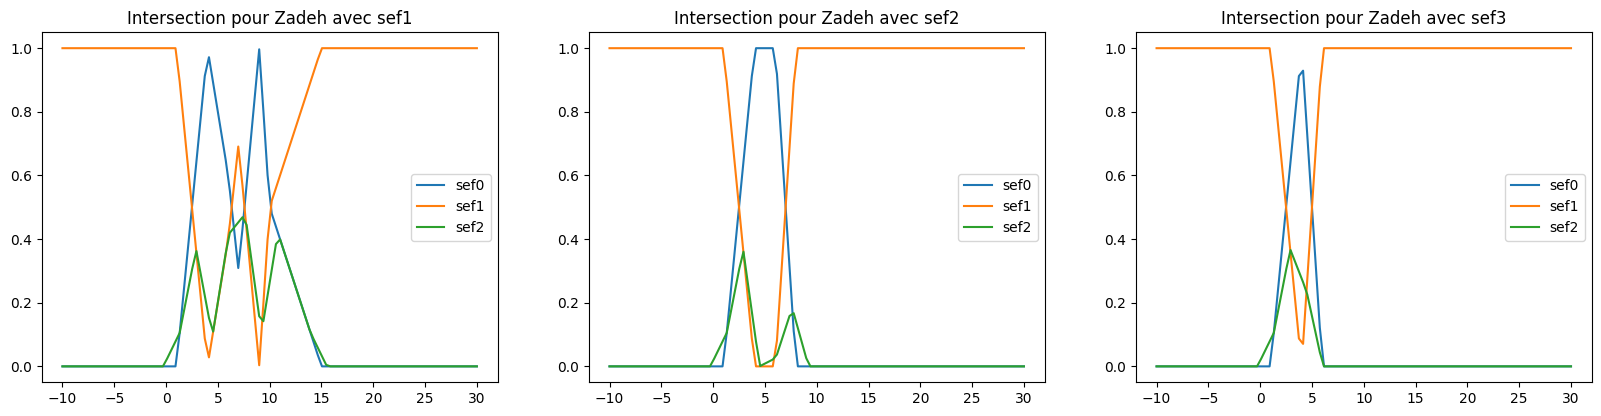

Pour la tnorme Produit d'Hamacher


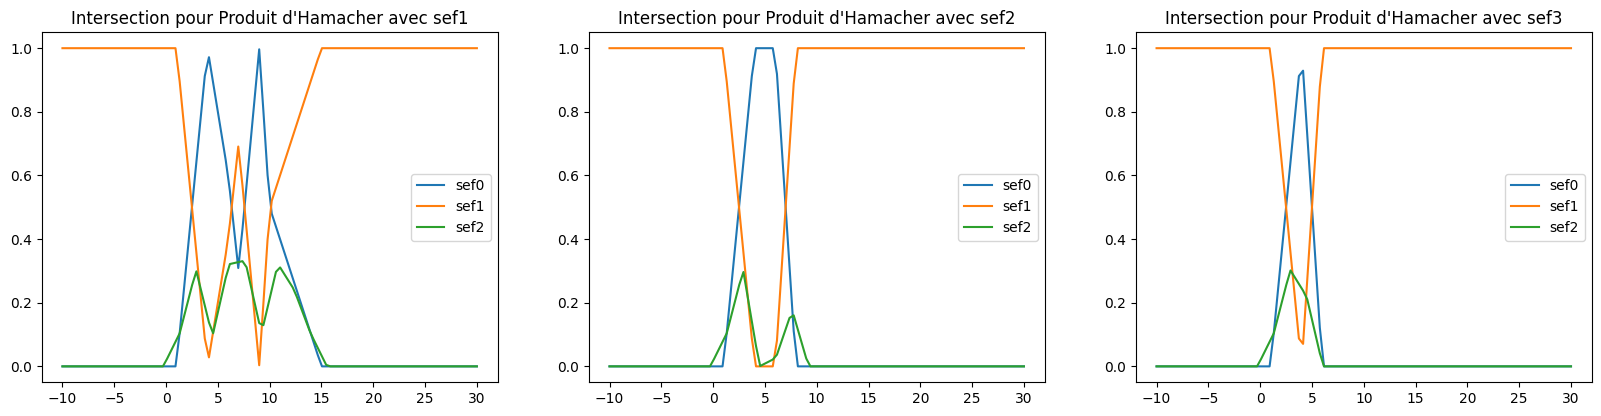

Pour la tnorme Drastique


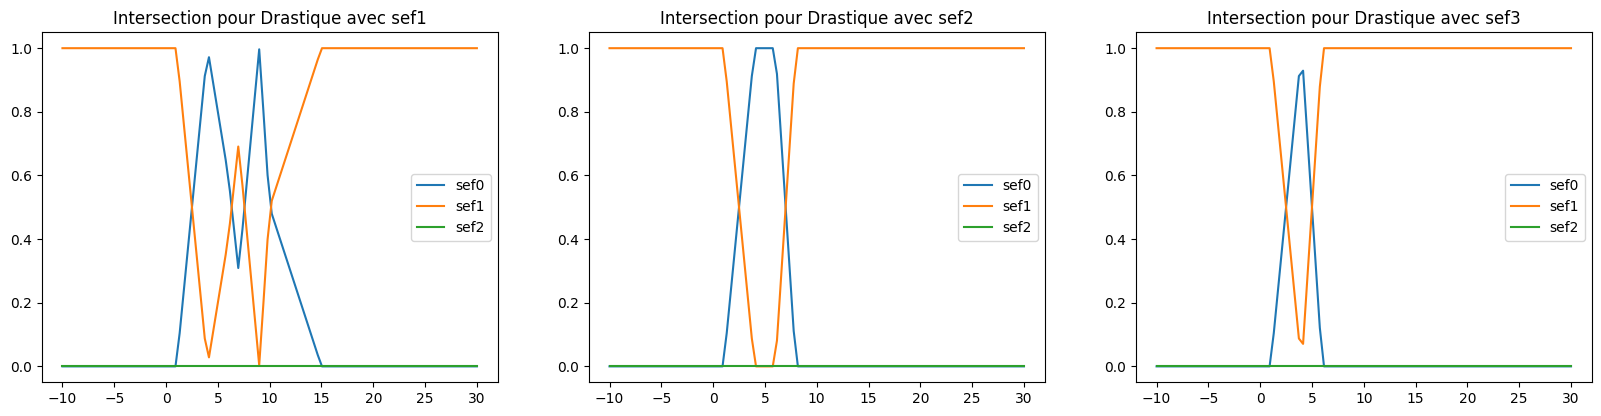

In [17]:
sefA = [sef1,sef2,sef3]
sefAc = [complementaire_sef(sef1),complementaire_sef(sef2),complementaire_sef(sef3)]
for i in range(len(tnorm_liste)):
    print(f'Pour la tnorme {tnorm_liste[i].nom}')
    plt.figure(figsize=(20,10))
    for j in range(len(sefA)):
        sefi = intersection([-5,25],sefA[j],sefAc[j], tnorm_liste[i])
        plt.subplot(2,3,j+1)
        plt.title(f'Intersection pour {tnorm_liste[i].nom} avec sef{j+1}')
        visualisation([sefA[j],sefAc[j],sefi],100)
    plt.show()


4.1 $A \cap A^c$ Tconorm

Pour la tconorme dual_probabiliste


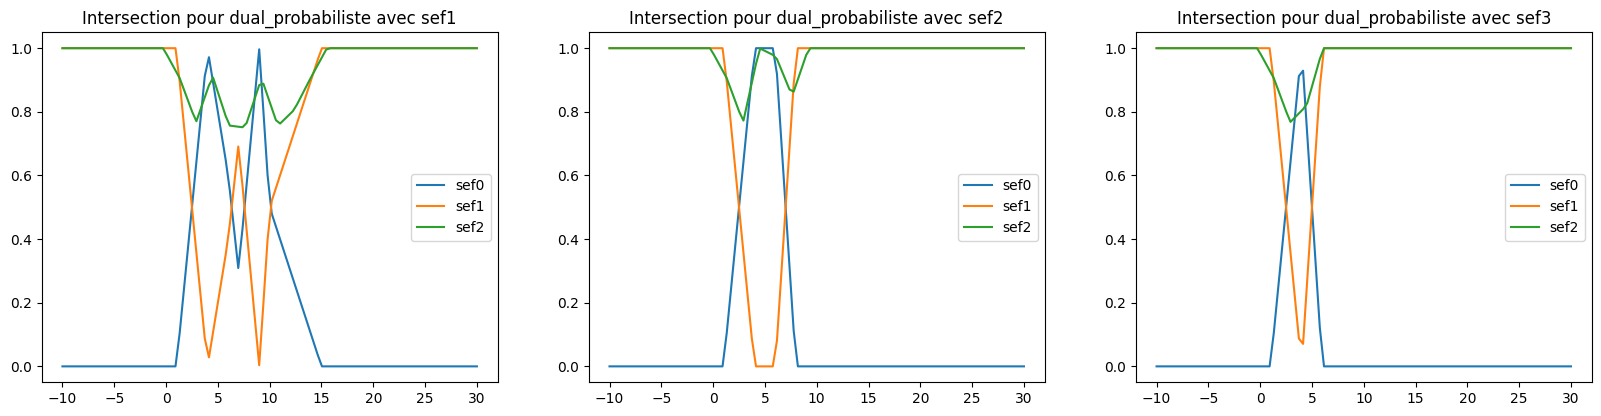

Pour la tconorme dual_Lukasiewicz


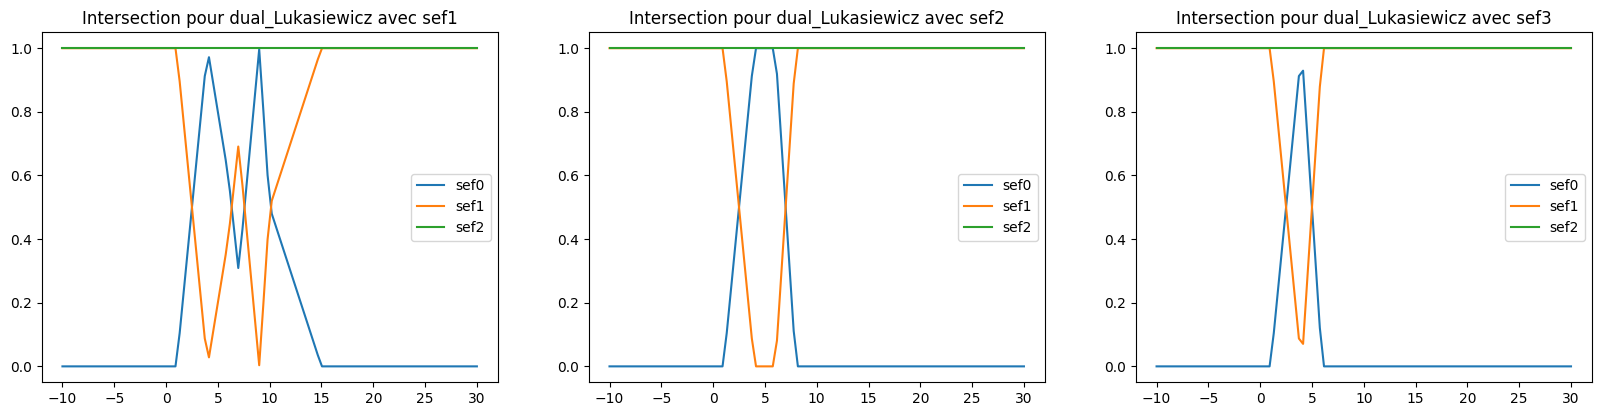

Pour la tconorme Dual_Zadeh


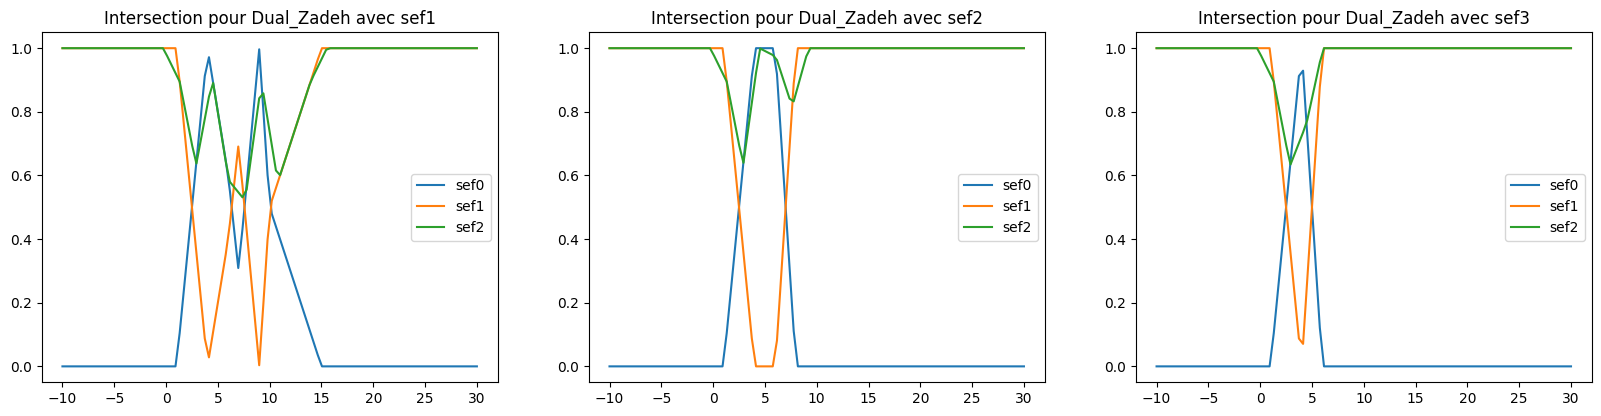

Pour la tconorme Dual_Produit d'Hamacher


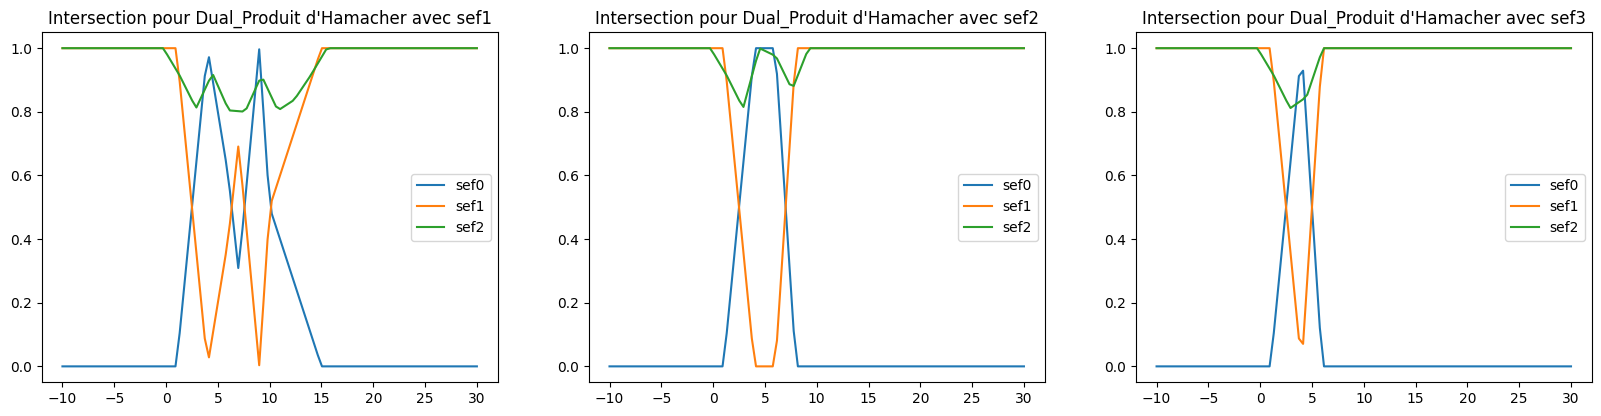

Pour la tconorme Dual_Drastique


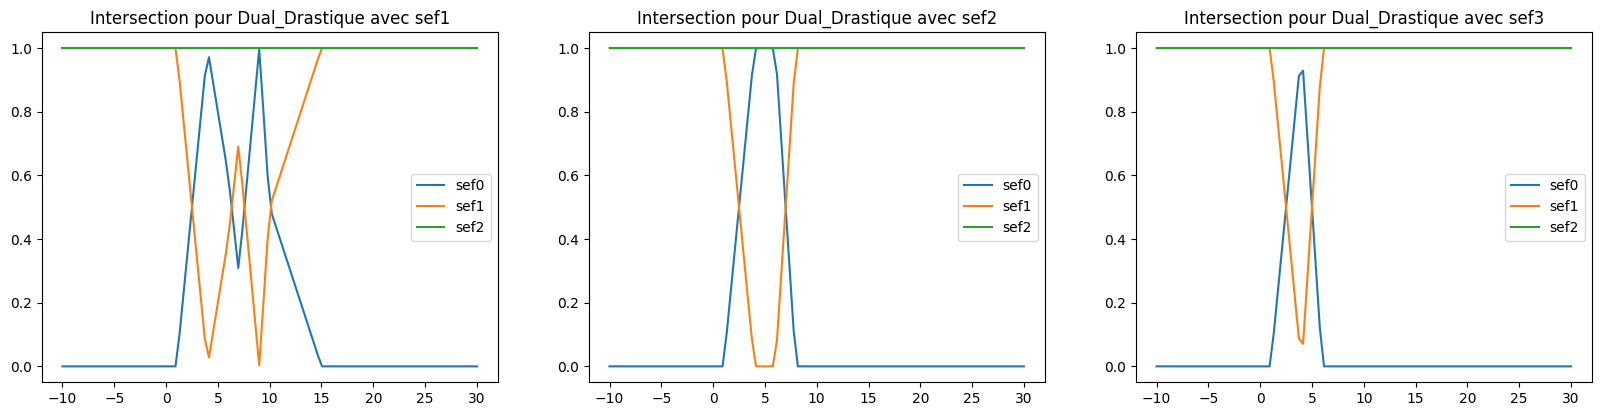

In [18]:
sefA = [sef1,sef2,sef3]
sefAc = [complementaire_sef(sef1),complementaire_sef(sef2),complementaire_sef(sef3)]
for i in range(len(tconorm_liste)):
    print(f'Pour la tconorme {tconorm_liste[i].nom}')
    plt.figure(figsize=(20,10))
    for j in range(len(sefA)):
        sefi = intersection([-5,25],sefA[j],sefAc[j], tconorm_liste[i])
        plt.subplot(2,3,j+1)
        plt.title(f'Intersection pour {tconorm_liste[i].nom} avec sef{j+1}')
        visualisation([sefA[j],sefAc[j],sefi],100)
    plt.show()

4.2 $A \cup A^c$ tnorm

Pour la tnorme probabiliste


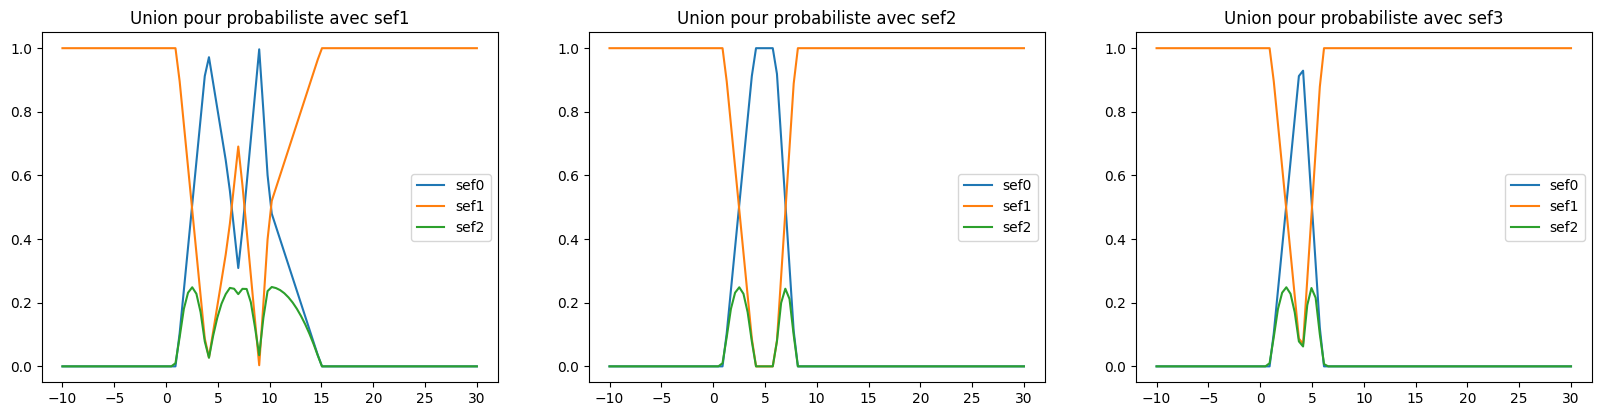

Pour la tnorme Lukasiewicz


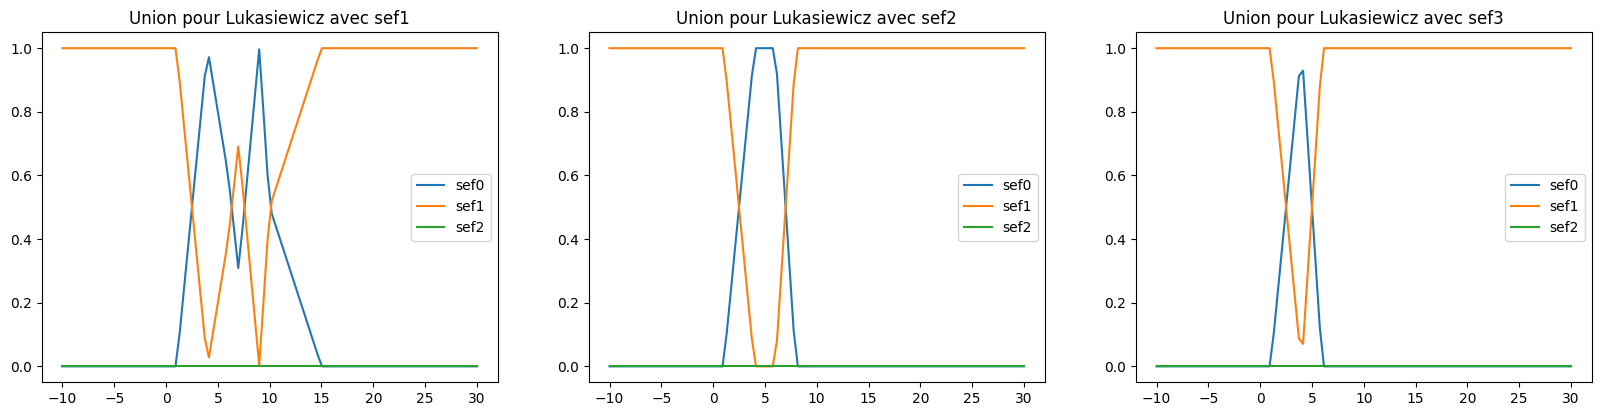

Pour la tnorme Zadeh


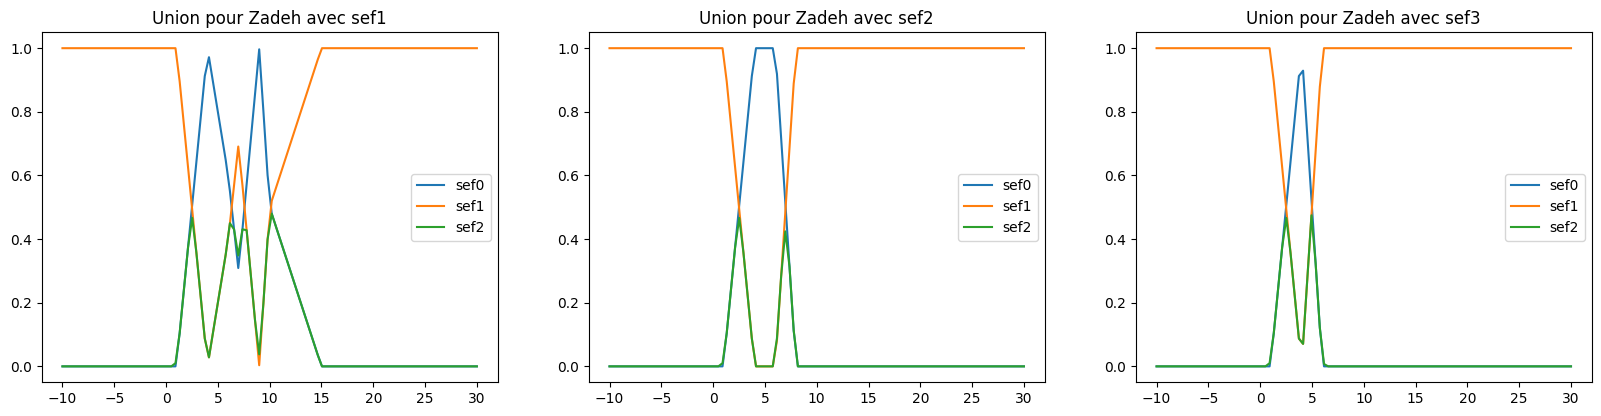

Pour la tnorme Produit d'Hamacher


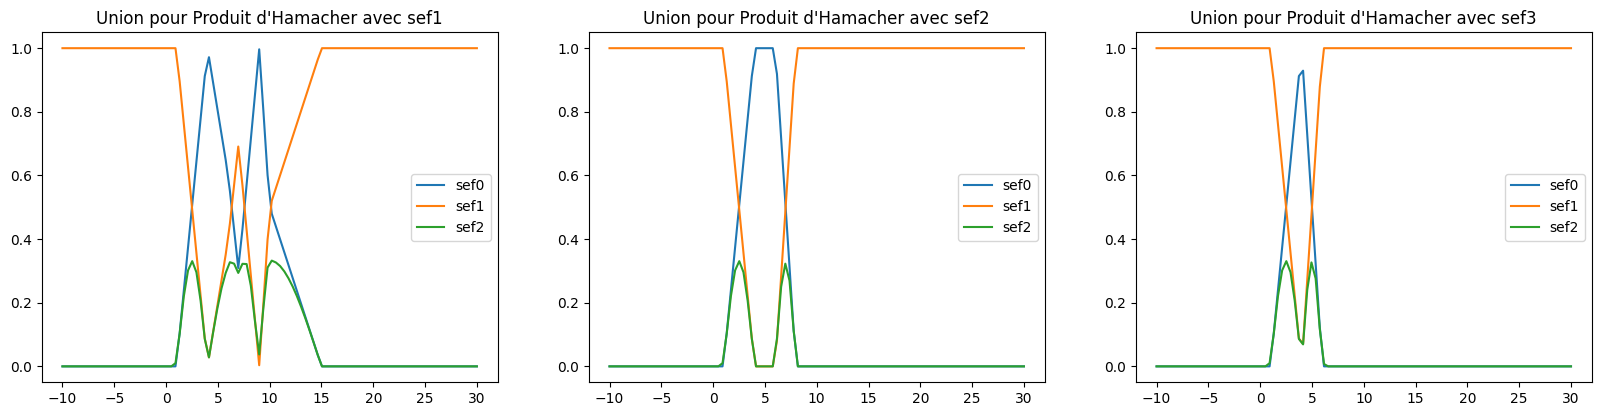

Pour la tnorme Drastique


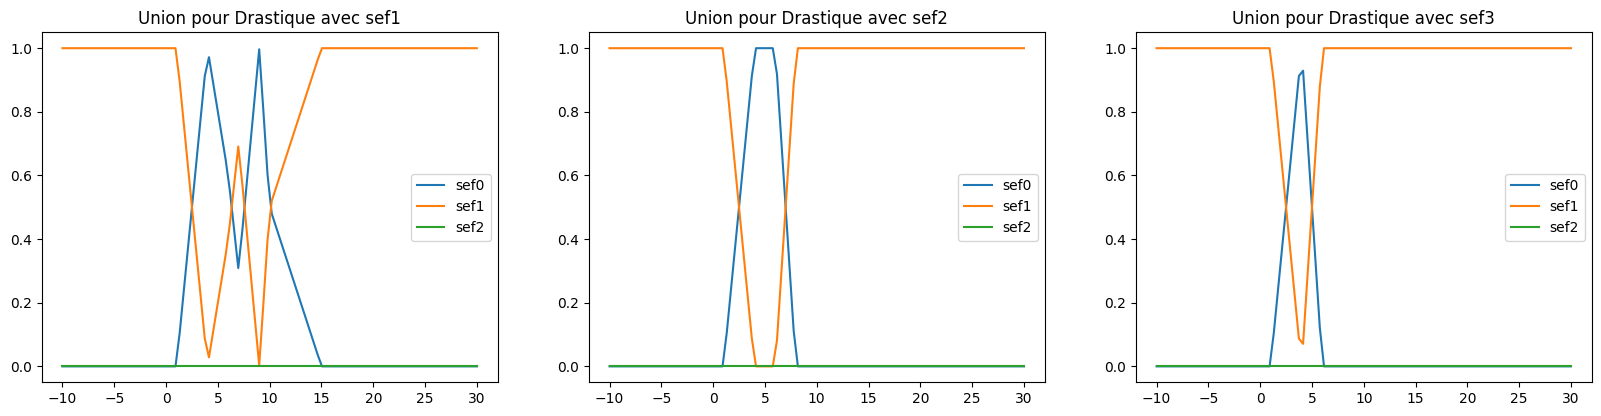

In [19]:
sefA = [sef1,sef2,sef3]
sefAc = [complementaire_sef(sef1),complementaire_sef(sef2),complementaire_sef(sef3)]
for i in range(len(tnorm_liste)):
    print(f'Pour la tnorme {tnorm_liste[i].nom}')
    plt.figure(figsize=(20,10))
    for j in range(len(sefA)):
            sefi = union([-5,25],sefA[j],sefAc[j], tnorm_liste[i])
            plt.subplot(2,3,j+1)
            plt.title(f'Union pour {tnorm_liste[i].nom} avec sef{j+1}')
            visualisation([sefA[j],sefAc[j],sefi],100)
    plt.show()

4.2 $A \cup A^c$ tconorm

Pour la tconorme dual_probabiliste


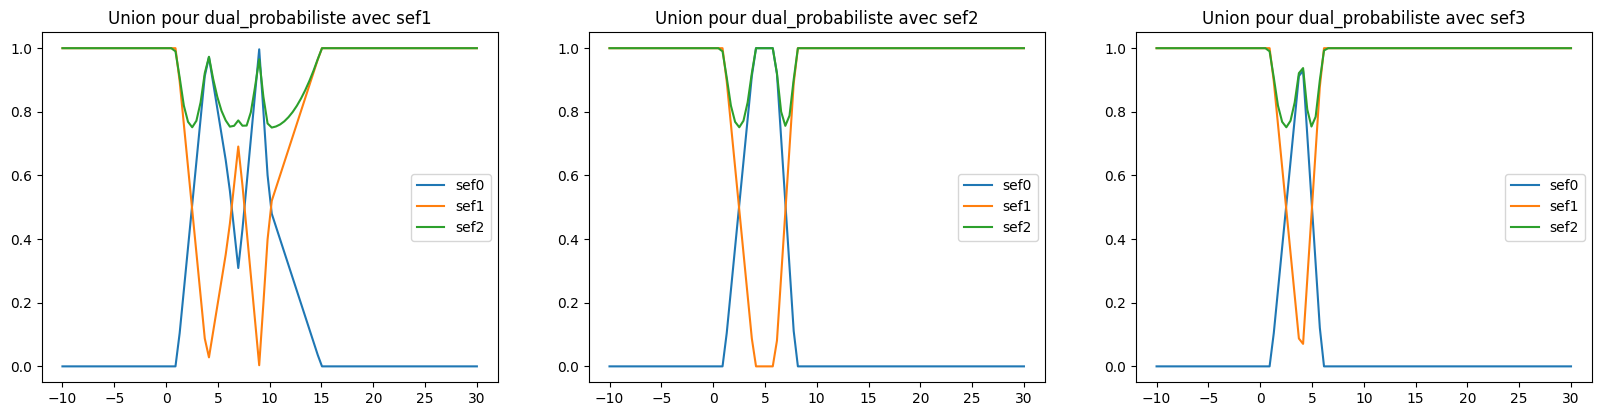

Pour la tconorme dual_Lukasiewicz


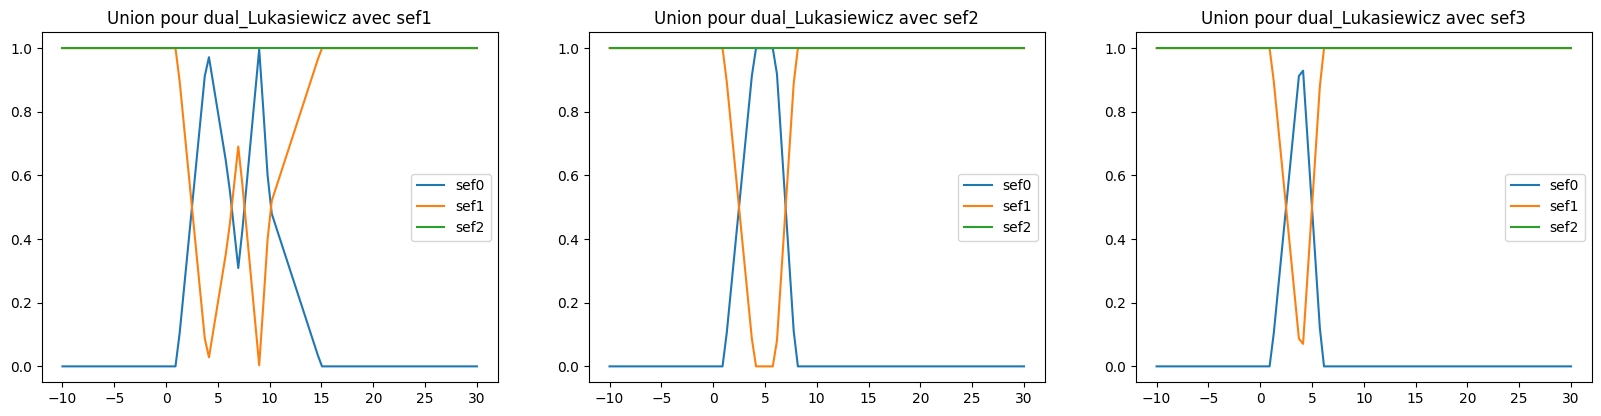

Pour la tconorme Dual_Zadeh


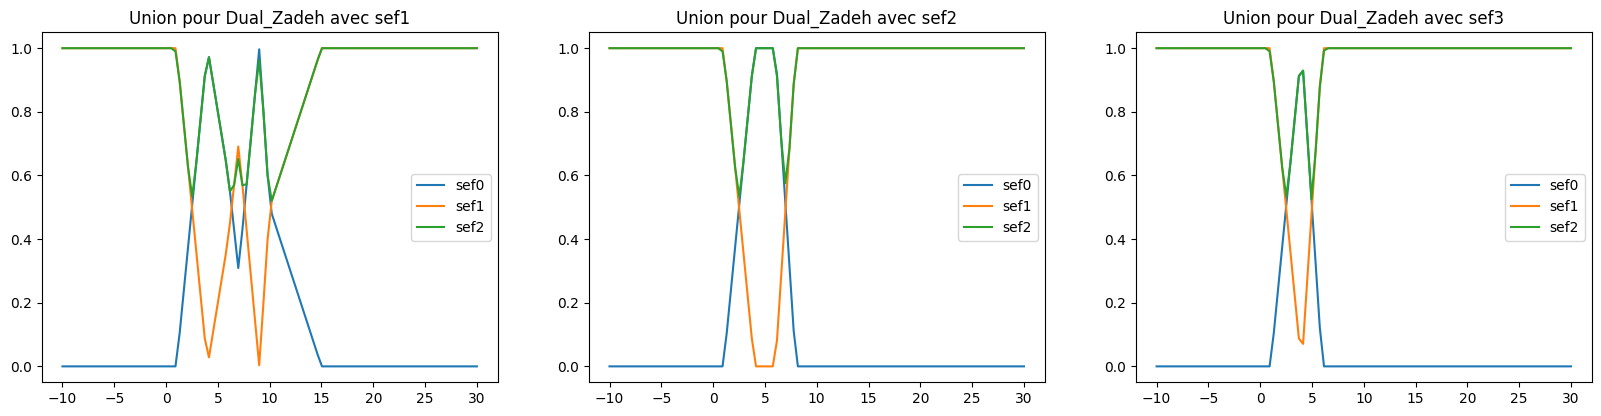

Pour la tconorme Dual_Produit d'Hamacher


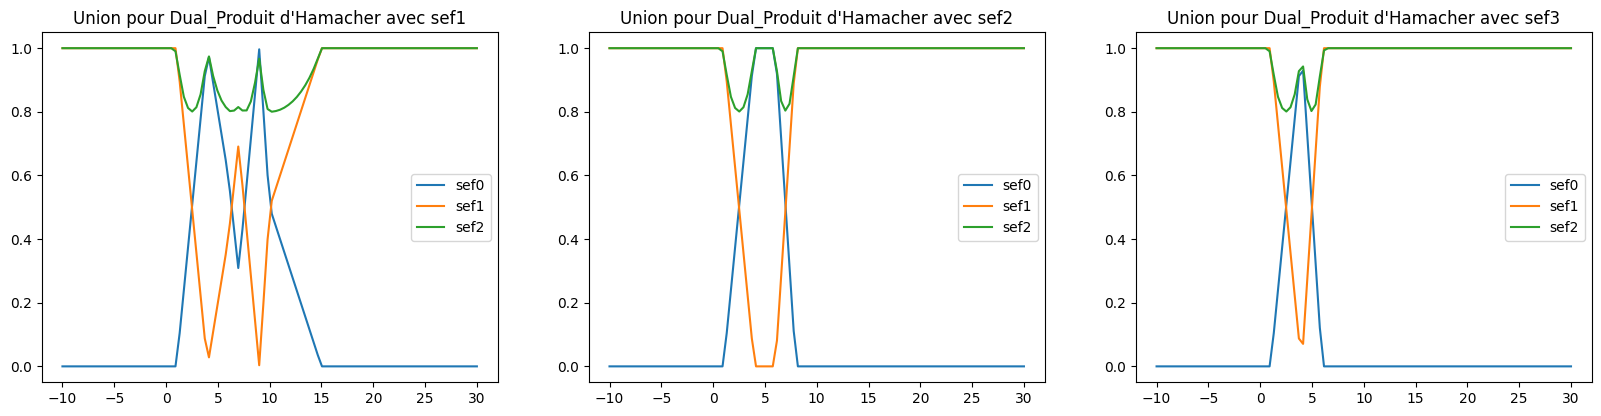

Pour la tconorme Dual_Drastique


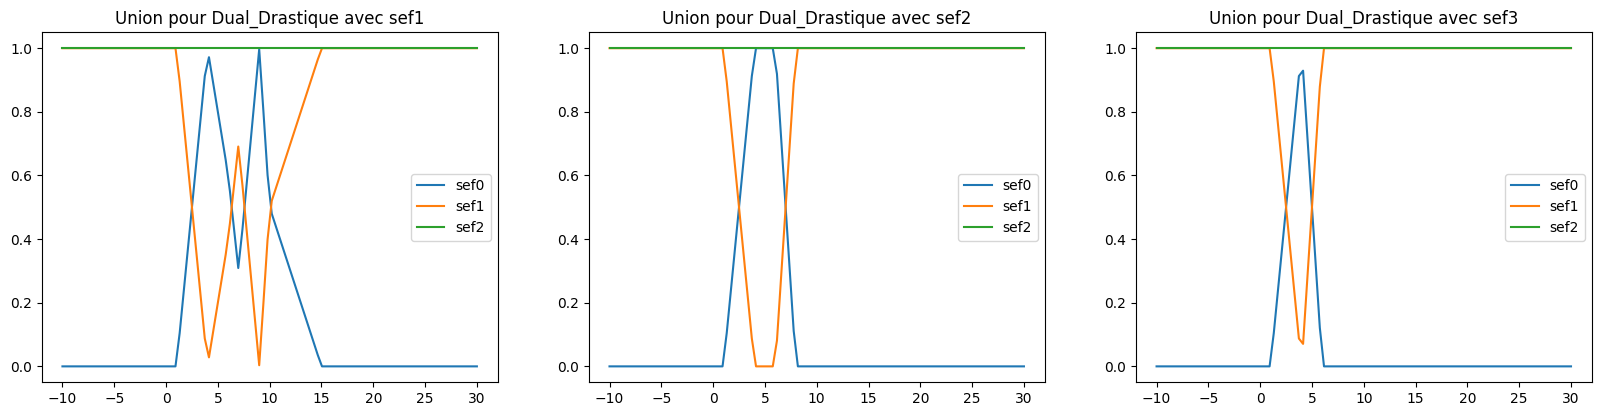

In [20]:
sefA = [sef1,sef2,sef3]
sefAc = [complementaire_sef(sef1),complementaire_sef(sef2),complementaire_sef(sef3)]
for i in range(len(tconorm_liste)):
    print(f'Pour la tconorme {tconorm_liste[i].nom}')
    plt.figure(figsize=(20,10))
    for j in range(len(sefA)):
            sefi = union([-5,25],sefA[j],sefAc[j], tconorm_liste[i])
            plt.subplot(2,3,j+1)
            plt.title(f'Union pour {tconorm_liste[i].nom} avec sef{j+1}')
            visualisation([sefA[j],sefAc[j],sefi],100)
    plt.show()

# Principe d'extension

1. classe phi

In [21]:
class phi:
    def __init__(self, nom,fonction,inverse_fonction):
        self.fonction = fonction
        self.inverse_fonction = inverse_fonction
        self.nom = nom

    def calcul(self, x):
        return self.fonction(x)

    def antecedent(self, y):
        return self.inverse_fonction(y)

    def __str__(self):
        return self.nom



class carre(phi):
    def __init__(self):
        super().__init__( 'carré', lambda x: x**2, lambda y: [m.sqrt(y),- m.sqrt(y)] if y >=0 else [])

class sin(phi):
    def __init__(self):
        super().__init__( 'sinus', lambda x: m.sin(x),lambda y: m.asin(y))



In [22]:
c = carre()
print(c.calcul(2))
print(c.antecedent(2))
print(c.calcul(-1))
print(c.antecedent(-1))

d = sin()
print(d.calcul(4))
print(d.antecedent(0.5))


4
[1.4142135623730951, -1.4142135623730951]
1
[]
-0.7568024953079282
0.5235987755982989


2. Fonction extension

In [77]:
def extension(A, phi, n=20):
    """
    Fonction extension qui, pour un sous-ensemble flou A et une fonction ϕ donnés, calcule l'image floue de A par ϕ
    """
    # on convertit A en un tableau numpy sinon avec une liste de tuples on ne peut pas utiliser la noation A[:, 0] ou A[:, 1]
    A = np.array(A)
    
    f_b = []
    f_a = lambda x: np.interp(x, A[:, 0], A[:, 1])
    y = []

    # on calcule les images des éléments de A par la fonction phi
    for i in range(len(A)):
        y.append(float(phi.calcul(A[i][0])))

    #on définit les plages de valeurs de y 
    y_min = min(y)
    y_max = max(y)

    # on définit un ensemble y de valeurs linéairement espacées dans la plage de y_min à y_max
    y = np.linspace(y_min, y_max, n)

    # on calcul l'antécédent de chaque valeur de y
    for i in range(len(y)):
        if phi.antecedent(y[i]) != []:
            f_b.append((y[i], max(f_a(phi.antecedent(y[i])))))
        else:
            f_b.append((y[i], 0))

    return f_b


Reprenon un exemple du cours afin de tester notre fonction: quelle est la surface d’une pièce carrée d’environ 3m de côté ?

[(4.0, 0.0), (4.631578947368421, 0.15211034739588136), (5.2631578947368425, 0.29415733870561755), (5.894736842105263, 0.42790791466753575), (6.526315789473684, 0.5546654946340204), (7.157894736842105, 0.6754242162397546), (7.789473684210526, 0.7909628596974425), (8.421052631578947, 0.9019050004400464), (9.052631578947368, 0.9912408572723259), (9.68421052631579, 0.8880535791380035), (10.31578947368421, 0.7881797258121352), (10.94736842105263, 0.6913192325259558), (11.578947368421051, 0.5972147631063973), (12.210526315789473, 0.5056436478530881), (12.842105263157894, 0.4164116777791156), (13.473684210526315, 0.32934825807101165), (14.105263157894736, 0.24430257370288988), (14.736842105263158, 0.1611405202504277), (15.368421052631579, 0.07974222115030072), (16.0, 0.0)]


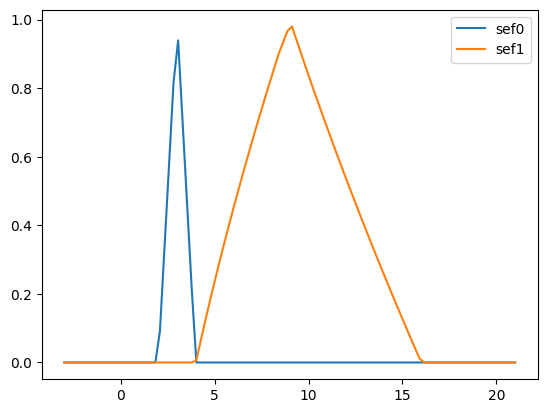

In [78]:
sef_piece = [(2,0),(3,1),(4,0)]

result = extension(sef_piece, carre())
print(result)
visualisation([sef_piece, result],100)